![title](img/lena_img.png)

### 数据读取-图像
- cv2.IMREAD_COLOR：彩色图像
- cv2.IMREAD_GRAYSCALE：灰度图像

In [111]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('img/cat.jpg', cv2.IMREAD_COLOR)

In [112]:
img.shape

(414, 500, 3)

In [113]:
#图像显示
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [114]:
cv2.imwrite('img/mycat.jpg', img)
print(type(img))
print(img.size)
print(img.dtype)

<class 'numpy.ndarray'>
621000
uint8


In [115]:
vc = cv2.VideoCapture('img/test.mp4')
vc.isOpened()

True

In [116]:
# 检查是否打开正确
open = True
if vc.isOpened(): 
    oepn, frame = vc.read()
else:
    open = False

In [117]:
while open:
    ret, frame = vc.read()
    if frame is None:
        break
    if ret == True:
        gray = cv2.cvtColor(frame,  cv2.COLOR_BGR2GRAY)
        cv2.imshow('result', gray)
        if cv2.waitKey(100) & 0xFF == 27:
            break
vc.release()
cv2.destroyAllWindows()

### 截取部分图像数据

In [118]:
def cv_show(name,img):
    cv2.imshow(name,img) 
    cv2.waitKey(0) 
    cv2.destroyAllWindows()

In [119]:
img=cv2.imread('img/cat.jpg', cv2.IMREAD_COLOR)
cat=img[0:50,0:200]
cv_show('cat',cat)

### 颜色通道提取

In [120]:
b,g,r=cv2.split(img)

In [121]:
r.shape

(414, 500)

In [122]:
# 只保留R
cur_img = img.copy()
cur_img[:,:,0] = 0
cur_img[:,:,1] = 0
cv_show('R',cur_img)

In [123]:
img=cv2.merge((b,g,r))
img.shape

(414, 500, 3)

### 边界填充

In [124]:
top_size,bottom_size,left_size,right_size = (50,50,50,50)

replicate = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size,cv2.BORDER_CONSTANT, value=0)


In [125]:
cv_show('img',img)

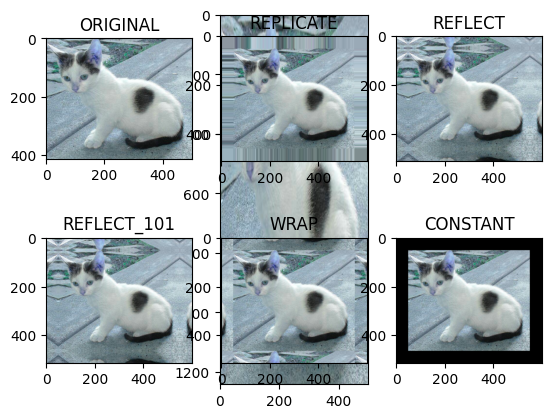

In [126]:
import matplotlib.pyplot as plt
plt.subplot(231),plt.imshow(img, cmap=None), plt.title('ORIGINAL')
plt.subplot(232), plt.imshow(replicate, 'gray'), plt.title('REPLICATE')
plt.subplot(233), plt.imshow(reflect, 'gray'), plt.title('REFLECT')
plt.subplot(234), plt.imshow(reflect101, 'gray'), plt.title('REFLECT_101')
plt.subplot(235), plt.imshow(wrap, 'gray'), plt.title('WRAP')
plt.subplot(236), plt.imshow(constant, 'gray'), plt.title('CONSTANT')
plt.show()

- BORDER_REPLICATE：复制法，也就是复制最边缘像素。
- BORDER_REFLECT：反射法，对感兴趣的图像中的像素在两边进行复制例如：fedcba|abcdefgh|hgfedcb   
- BORDER_REFLECT_101：反射法，也就是以最边缘像素为轴，对称，gfedcb|abcdefgh|gfedcba
- BORDER_WRAP：外包装法cdefgh|abcdefgh|abcdefg  
- BORDER_CONSTANT：常量法，常数值填充。

### 数值计算

In [127]:
img_cat=cv2.imread('img/cat.jpg')
img_dog=cv2.imread('img/dog.jpg')

In [128]:
img_cat2=img_cat+10
img_cat[:5,:,0]

array([[142, 146, 151, ..., 156, 155, 154],
       [108, 112, 118, ..., 155, 154, 153],
       [108, 110, 118, ..., 156, 155, 154],
       [139, 141, 148, ..., 156, 155, 154],
       [153, 156, 163, ..., 160, 159, 158]], shape=(5, 500), dtype=uint8)

In [129]:
img_cat2[:5,:,0]

array([[152, 156, 161, ..., 166, 165, 164],
       [118, 122, 128, ..., 165, 164, 163],
       [118, 120, 128, ..., 166, 165, 164],
       [149, 151, 158, ..., 166, 165, 164],
       [163, 166, 173, ..., 170, 169, 168]], shape=(5, 500), dtype=uint8)

In [130]:
#相当于% 256
(img_cat + img_cat2)[:5,:,0] 

array([[ 38,  46,  56, ...,  66,  64,  62],
       [226, 234, 246, ...,  64,  62,  60],
       [226, 230, 246, ...,  66,  64,  62],
       [ 32,  36,  50, ...,  66,  64,  62],
       [ 60,  66,  80, ...,  74,  72,  70]], shape=(5, 500), dtype=uint8)

In [131]:
b=cv2.add(img_cat,img_cat2)[:5,:,0]
cv_show('a',b)

In [132]:
img_cat.shape

(414, 500, 3)

In [133]:
img_dog.shape

(429, 499, 3)

In [134]:
img_dog=cv2.resize(img_dog,(500,414))
img_dog.shape

(414, 500, 3)

In [135]:
res=cv2.addWeighted(img_dog,0.6,img_cat,0.4,0)
cv_show('res',res)

In [140]:
res = cv2.resize(img, (0, 0), fx=4, fy=4)
plt.imshow(res)
cv_show('1',res)

In [139]:
res = cv2.resize(img, (0, 0), fx=1, fy=3)
cv_show('1',res)